In [3]:
import keras
keras.__version__

'2.2.5'

简单的向量数据保存在（samples，features）的2D张量中，对应Dense类 序列数据保存在（samples，timesteps,features）的3D张量中，对应LSTM类 图像数据通常用二维卷积层来处理，对应Conv2D

## 电影评论分类——二分类问题

### 使用IMDB数据集，含5万条两极分化的评论，一半训练集，训练集中一半正面

## 1、加载IMDB数据集

In [41]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

train_data[0]  #评论组成的列表，每条评论又是单词索引组成的列表

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [8]:
train_labels[0] #0表负面评论，1表正面评论

1

In [9]:
max([max(sequence) for sequence in train_data])

9999

将每条评论迅速解码为英文单词

In [10]:
word_index = imdb.get_word_index()  #word_index是一个将单词映射为整数索引的字典
reverse_word_index = dict([(value,key)for (key,value) in word_index.items()])  #键值颠倒，将整数索引为单词
decoded_review = ''.join([reverse_word_index.get(i - 3,'?') for i in train_data[0]])  #将评论解码
                                  #索引减去3，因为012是为了“padding”“未知词”“序列开始”分别保存的索引

## 2、准备数据——不可将整数序列直接输入网络，需将列表转换为张量即向量化——数据预处理

     方法1：填充列表
     方法2：对列表进行one-hot编码，将其转换为0和1组成的向量
     
### 将整数序列编码为二进制矩阵

#### enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中。enumerate(sequence, [start=0])sequence -- 一个序列、迭代器或其他支持迭代对象。start -- 下标起始位置

In [12]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

Here's what our samples look like now:

In [13]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

We should also vectorize our labels, which is straightforward:

In [14]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')  #向量化

Now our data is ready to be fed into a neural network.

## 3、构建网络

### 3.1定义模型

#### Keras 的核心数据结构是 model，一种组织网络层的方式。最简单的模型是 Sequential 顺序模型，它由多个网络层线性堆叠。对于更复杂的结构，你应该使用 Keras 函数式 API，它允许构建任意的神经网络图。

#### 使用 .add() 来堆叠模型

### layers.Dense(一众参数宝宝们介绍
           units:该层有几个神经元
           activation:该层使用的激活函数
           use_bias:是否添加偏置项
           kernel_initializer:权重初始化方法
           bias_initializer:偏置值初始化方法
           kernel_regularizer:权重规范化函数
           bias_regularizer:偏置值规范化方法
           activity_regularizer:输出的规范化方法
           kernel_constraint:权重变化限制函数

Here's what our network looks like:

![3-layer network](https://s3.amazonaws.com/book.keras.io/img/ch3/3_layer_network.png)

And here's the Keras implementation, very similar to the MNIST example you saw previously:

In [15]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

W1009 10:56:26.387067 10884 deprecation_wrapper.py:119] From d:\python\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1009 10:56:28.376072 10884 deprecation_wrapper.py:119] From d:\python\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1009 10:56:28.812493 10884 deprecation_wrapper.py:119] From d:\python\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



## 3.2编译模型

### 完成了模型的构建后, 可以使用 .compile() 来配置学习过程

In [17]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

W1009 10:56:35.137082 10884 deprecation_wrapper.py:119] From d:\python\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1009 10:56:35.246656 10884 deprecation_wrapper.py:119] From d:\python\lib\site-packages\keras\backend\tensorflow_backend.py:3657: The name tf.log is deprecated. Please use tf.math.log instead.

W1009 10:56:35.298607 10884 deprecation.py:323] From d:\python\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



## 3.3配置优化器

### 根据需要进一步地配置你的优化器。Keras 的核心原则是使事情变得相当简单，同时又允许用户在需要的时候能够进行完全的控制（终极的控制是源代码的易扩展性）

In [18]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

## 3.4使用自定义的损失和指标

In [19]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])


## 4、训练我的方法¶

### 4.1留出验证集——为了在训练过程中监控模型在前所未见的数据上的精度

In [20]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### 4.2训练模型

In [35]:
model.compile(optimizer ='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))   #评估拟合效果

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 123s 8ms/step - loss: 0.1509 - acc: 0.9459 - val_loss: 0.1486 - val_acc: 0.9492
Epoch 2/20
15000/15000 [==============================] - ETA: 0s - loss: 0.1172 - acc: 0.961 - 7s 461us/step - loss: 0.1174 - acc: 0.9617 - val_loss: 0.1641 - val_acc: 0.9403
Epoch 3/20
15000/15000 [==============================] - 5s 341us/step - loss: 0.0971 - acc: 0.9692 - val_loss: 0.1943 - val_acc: 0.9270
Epoch 4/20
15000/15000 [==============================] - 3s 183us/step - loss: 0.0805 - acc: 0.9769 - val_loss: 0.1940 - val_acc: 0.9277
Epoch 5/20
15000/15000 [==============================] - 3s 192us/step - loss: 0.0646 - acc: 0.9827 - val_loss: 0.2524 - val_acc: 0.9086
Epoch 6/20
15000/15000 [==============================] - 3s 195us/step - loss: 0.0547 - acc: 0.9861 - val_loss: 0.2341 - val_acc: 0.9178
Epoch 7/20
15000/15000 [==============================] - 3s 184us/step - loss: 0.04

In [36]:
# model.fit()返回了一个History对象，该对象有一个字典history成员，包含训练过程中所有数据
history_dict = history.history
history_dict.keys()    # 对应上面数据，字典四个条目，对应训练过程和验证过程中监控的指标

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

### 绘制训练和验证集

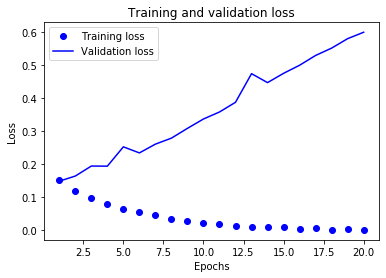

In [37]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

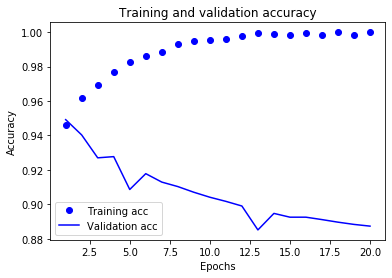

In [38]:
plt.clf()   # clear figure


acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1,len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

训练损失每轮都在降低、训练精度每轮都在提升；但验证相反，出现过拟合

### 从头开始重新训练一个模型

In [34]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 149s 6ms/step - loss: 0.4676 - acc: 0.8204
Epoch 2/4
25000/25000 [==============================] - 5s 193us/step - loss: 0.2665 - acc: 0.9083
Epoch 3/4
25000/25000 [==============================] - 5s 191us/step - loss: 0.2059 - acc: 0.9264
Epoch 4/4
25000/25000 [==============================] - 96s 4ms/step


In [39]:
results

[0.28965995958328244, 0.88384]

Our fairly naive approach achieves an accuracy of 88%. With state-of-the-art approaches, one should be able to get close to 95%.

## Using a trained network to generate predictions on new data

After having trained a network, you will want to use it in a practical setting. You can generate the likelihood of reviews being positive 
by using the `predict` method:

In [40]:
model.predict(x_test)

array([[9.1946125e-04],
       [1.0000000e+00],
       [9.9718142e-01],
       ...,
       [1.5436411e-03],
       [4.6755970e-03],
       [7.5374812e-01]], dtype=float32)

As you can see, the network is very confident for some samples (0.99 or more, or 0.01 or less) but less confident for others (0.6, 0.4). 


## Further experiments——进一步实验


* We were using 2 hidden layers. Try to use 1 or 3 hidden layers and see how it affects validation and test accuracy.
* Try to use layers with more hidden units or less hidden units: 32 units, 64 units...
* Try to use the `mse` loss function instead of `binary_crossentropy`.
* Try to use the `tanh` activation (an activation that was popular in the early days of neural networks) instead of `relu`.

These experiments will help convince you that the architecture choices we have made are all fairly reasonable, although they can still be 
improved!

## Conclusions


Here's what you should take away from this example:

* There's usually quite a bit of preprocessing you need to do on your raw data in order to be able to feed it -- as tensors -- into a neural  需对原始数据进行大量预处理，以便其转换为张量输入到神经网络中，单词课编码为二进制向量。
network. In the case of sequences of words, they can be encoded as binary vectors -- but there are other encoding options too.
* Stacks of `Dense` layers with `relu` activations can solve a wide range of problems (including sentiment classification), and you will   
likely use them frequently.
* In a binary classification problem (two output classes), your network should end with a `Dense` layer with 1 unit and a `sigmoid` activation, 对于二分类，最后一层应使用sigmiod，使网络输出标量范围在0~1，表概率值
i.e. the output of your network should be a scalar between 0 and 1, encoding a probability.
* With such a scalar sigmoid output, on a binary classification problem, the loss function you should use is `binary_crossentropy`.二分类的sigmiod标量输出，损失函数用binary_crossentropy
* The `rmsprop` optimizer is generally a good enough choice of optimizer, whatever your problem. That's one less thing for you to worry 最好的优化器选择‘rmsprop’
about.
* As they get better on their training data, neural networks eventually start _overfitting_ and end up obtaining increasingly worse results on data never-seen-before. Make sure to always monitor performance on data that is outside of the training set.训练集上表现好最终都会过拟合，未见过的数据上表现差
